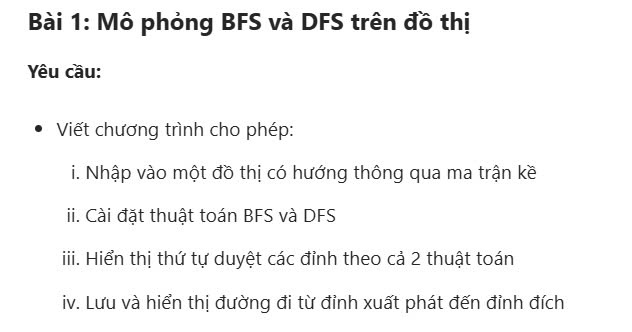

![Screenshot 2024-12-05 145956.png](<attachment:Screenshot 2024-12-05 145956.png>)
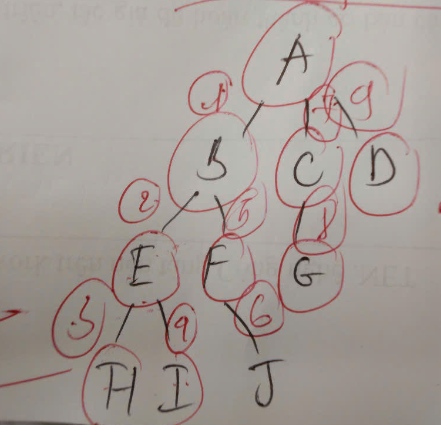

    1.1. Định nghĩa thuật toán Depth - First Search (DFS): Sử dụng ngăn xếp (stack) để quản lý các trạng thái cần duyệt. DFS đảm bảo tìm thấy lời giải nhanh hơn, nhưng không đảm bảo là ngắn nhất. 
    Thuật toán này sẽ duyệt theo chiều sâu.

    1.1.1. Xây dựng hàm

In [17]:
def dfs(graph, start, visited, path):
    # Đánh dấu đỉnh đã được thăm
    visited[start] = True
    path.append(start)
    
    # Duyệt qua các đỉnh kề chưa được thăm
    for neighbor in range(len(graph[start])):
        if graph[start][neighbor] == 1 and not visited[neighbor]:
            dfs(graph, neighbor, visited, path)

    1.1.2. Hiển thị đường đi của thuật toán DFS

In [18]:
def print_path(path):
    print("Thứ tự duyệt DFS: ", path)

Kết quả:

In [19]:
def main():
    # Ma trận kề đại diện cho đồ thị có hướng
    graph = [
        [0,1,1,1,0,0,0,0,0,0],  # Đỉnh 0
        [0,0,0,0,1,1,0,0,0,0],  # Đỉnh 1
        [0,0,0,0,0,0,1,0,0,0],  # Đỉnh 2
        [0,0,0,0,0,0,0,0,0,0],  # Đỉnh 3
        [0,0,0,0,0,0,0,1,1,0],  # Đỉnh 4,...
        [0,0,0,0,0,0,0,0,0,1],
        [0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0],
    ]
    
    # Khởi tạo mảng visited và path
    visited = [False] * len(graph)
    path = []

    # Gọi DFS từ đỉnh 0
    dfs(graph, 0, visited, path)
    
    # Hiển thị kết quả
    print_path(path)


In [20]:

# Gọi hàm chính
if __name__ == "__main__":
    main()

Thứ tự duyệt DFS:  [0, 1, 4, 7, 8, 5, 9, 2, 6, 3]


    1.2. Thuật toán Breadth - First Search (BFS): Sủ dụng hàng đợi (Queue) để quản lý các trạng thái cần duyệt. BFS đảm bảo tìm thấy lời giải ngắn nhất nếu có. 
    Thuật toán này duyệt theo chiều rộng.

    1.2.1. Xây dựng hàm.

In [21]:
from collections import deque
def bfs(graph, start):
    visited = [False] * len(graph)
    queue = deque([start])
    visited[start] = True
    path = []

    while queue:
        current = queue.popleft()
        path.append(current)
        for neighbor in range(len(graph[current])):
            if graph[current][neighbor] == 1 and not visited[neighbor]:
                queue.append(neighbor)
                visited[neighbor] = True

    return path

    1.2.2. Hiển thị đường đi thuật toán BFS

In [22]:
def print_path(path):
    print("Thứ tự duyệt BFS: ", path)

In [23]:
def main():
    # Ma trận kề đại diện cho đồ thị có hướng
    graph = [
        [0,1,1,1,0,0,0,0,0,0],  # Đỉnh 0
        [0,0,0,0,1,1,0,0,0,0],  # Đỉnh 1
        [0,0,0,0,0,0,1,0,0,0],  # Đỉnh 2
        [0,0,0,0,0,0,0,0,0,0],  # Đỉnh 3
        [0,0,0,0,0,0,0,1,1,0],  # Đỉnh 4,...
        [0,0,0,0,0,0,0,0,0,1],
        [0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0],
    ]

    # Điểm bắt đầu
    start = 0
    # Thực hiện BFS
    path_bfs=bfs(graph, start)
    
    # Hiển thị kết quả
    print_path(path_bfs)

In [24]:
# Gọi hàm chính
if __name__ == "__main__":
    main()

Thứ tự duyệt BFS:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


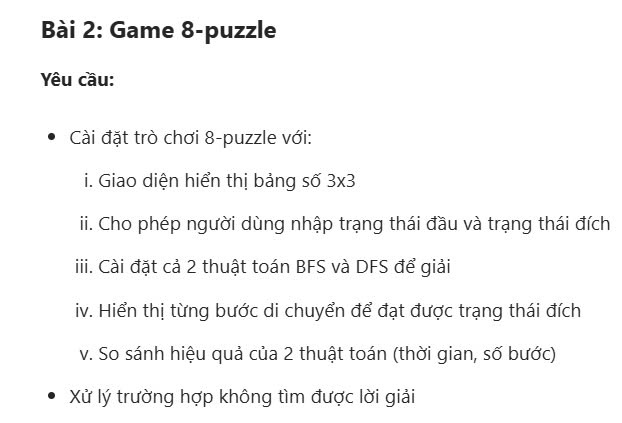

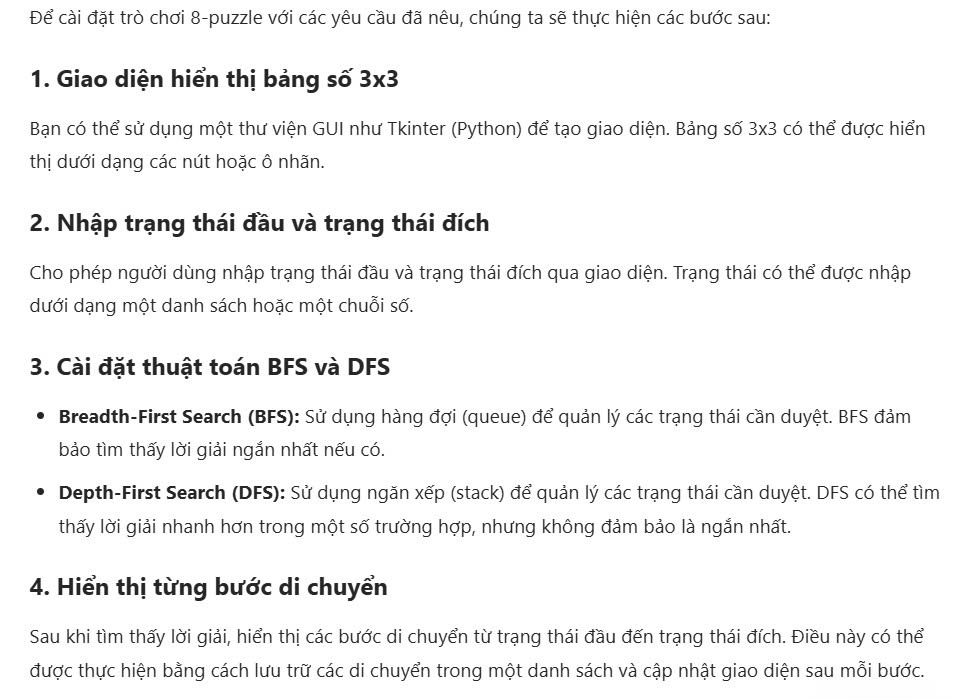

    2.1. Giới thiệu về game 8 - puzzle: Hiểu đơn giản thì đó là trò chơi xếp hình ý. Xong đối với AI, nó được hiểu là sắp xếp các số sao cho kết quả nhận được là dãy các số liên tiếp.

    2.1.1. Áp dụng DFS

In [25]:
import copy
from collections import deque
import time

In [26]:
# Kiểm tra xem trạng thái hiện tại có phải là trạng thái đích
def is_goal(state, goal):
    return state == goal

In [27]:
# Tìm vị trí ô trống (0) trong bảng
def find_zero(state):
    for i in range(len(state)):
        for j in range(len(state[i])):
            if state[i][j] == 0:
                return i, j

In [28]:
# Sinh các trạng thái con (các bước di chuyển hợp lệ)
def get_neighbors(state):
    neighbors = []
    x, y = find_zero(state)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Lên, Xuống, Trái, Phải

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(state) and 0 <= ny < len(state[0]):  # Kiểm tra biên
            new_state = copy.deepcopy(state)
            # Hoán đổi vị trí ô trống với ô kề
            new_state[x][y], new_state[nx][ny] = new_state[nx][ny], new_state[x][y]
            neighbors.append(new_state)

    return neighbors

Áp dụng thuật toán DFS

In [29]:
# Thuật toán DFS
def dfs(start, goal):
    stack = [(start, [])]  # Ngăn xếp lưu (trạng thái hiện tại, đường đi)
    visited = set()  # Tập hợp để tránh lặp trạng thái

    while stack:
        current_state, path = stack.pop()
        state_tuple = tuple(tuple(row) for row in current_state)

        if state_tuple in visited:
            continue
        visited.add(state_tuple)

        if is_goal(current_state, goal):
            return path + [current_state]

        for neighbor in get_neighbors(current_state):
            stack.append((neighbor, path + [current_state]))

    return None  # Không tìm thấy lời giải


    2.2.2. Áp dụng BFS

In [ ]:
def bfs(start, goal):
    queue = deque([(start, [])])  # Hàng đợi lưu (trạng thái hiện tại, đường đi)
    visited = set()

    while queue:
        current_state, path = queue.popleft()
        state_tuple = tuple(tuple(row) for row in current_state)

        if state_tuple in visited:
            continue
        visited.add(state_tuple)

        if is_goal(current_state, goal):
            return path + [current_state]

        for neighbor in get_neighbors(current_state):
            queue.append((neighbor, path + [current_state]))

    return None  # Không tìm thấy lời giải

In [ ]:
# Hiển thị bảng
def print_board(state):
    for row in state:
        print(" ".join(map(str, row)))
    print()

: 

Trạng thái ban đầu:
1 2 3
4 0 5
6 7 8

Trạng thái đích:
1 2 3
4 5 6
7 8 0

In [32]:
# Hàm chính
def main():
    # Nhập trạng thái ban đầu và đích từ người dùng
    print("Nhập trạng thái ban đầu (9 số, cách nhau bởi khoảng trắng):")
    start = list(map(int, input().split()))
    print("Nhập trạng thái đích (9 số, cách nhau bởi khoảng trắng):")
    goal = list(map(int, input().split()))

    start = [start[:3], start[3:6], start[6:]]
    goal = [goal[:3], goal[3:6], goal[6:]]

    print("\nTrạng thái ban đầu:")
    print_board(start)

    print("Trạng thái đích:")
    print_board(goal)

    # Thực hiện DFS
    print("\nĐang giải bằng DFS...")
    start_time = time.time()
    dfs_solution = dfs(start, goal)
    dfs_time = time.time() - start_time

    if dfs_solution:
        print(f"Tìm thấy lời giải bằng DFS với {len(dfs_solution) - 1} bước:")
        for step in dfs_solution:
            print_board(step)
    else:
        print("DFS: Không tìm thấy lời giải.")
    print(f"Thời gian thực thi DFS: {dfs_time:.2f} giây\n")

    # Thực hiện BFS
    print("Đang giải bằng BFS...")
    start_time = time.time()
    bfs_solution = bfs(start, goal)
    bfs_time = time.time() - start_time

    if bfs_solution:
        print(f"Tìm thấy lời giải bằng BFS với {len(bfs_solution) - 1} bước:")
        for step in bfs_solution:
            print_board(step)
    else:
        print("BFS: Không tìm thấy lời giải.")
    print(f"Thời gian thực thi BFS: {bfs_time:.2f} giây\n")

    # So sánh hiệu quả
    print("So sánh kết quả:")
    print(f"- DFS: {len(dfs_solution) - 1 if dfs_solution else 'Không tìm thấy'} bước, {dfs_time:.2f} giây")
    print(f"- BFS: {len(bfs_solution) - 1 if bfs_solution else 'Không tìm thấy'} bước, {bfs_time:.2f} giây")

if __name__ == "__main__":
    main()

Nhập trạng thái ban đầu (9 số, cách nhau bởi khoảng trắng):
Nhập trạng thái đích (9 số, cách nhau bởi khoảng trắng):

Trạng thái ban đầu:
1 2 3
4 0 5
6 7 8

Trạng thái đích:
1 2 3
4 5 6
7 8 0


Đang giải bằng DFS...
Tìm thấy lời giải bằng DFS với 19992 bước:
1 2 3
4 0 5
6 7 8

1 2 3
4 5 0
6 7 8

1 2 3
4 5 8
6 7 0

1 2 3
4 5 8
6 0 7

1 2 3
4 5 8
0 6 7

1 2 3
0 5 8
4 6 7

1 2 3
5 0 8
4 6 7

1 2 3
5 8 0
4 6 7

1 2 3
5 8 7
4 6 0

1 2 3
5 8 7
4 0 6

1 2 3
5 8 7
0 4 6

1 2 3
0 8 7
5 4 6

1 2 3
8 0 7
5 4 6

1 2 3
8 7 0
5 4 6

1 2 3
8 7 6
5 4 0

1 2 3
8 7 6
5 0 4

1 2 3
8 7 6
0 5 4

1 2 3
0 7 6
8 5 4

1 2 3
7 0 6
8 5 4

1 2 3
7 6 0
8 5 4

1 2 3
7 6 4
8 5 0

1 2 3
7 6 4
8 0 5

1 2 3
7 6 4
0 8 5

1 2 3
0 6 4
7 8 5

1 2 3
6 0 4
7 8 5

1 2 3
6 4 0
7 8 5

1 2 3
6 4 5
7 8 0

1 2 3
6 4 5
7 0 8

1 2 3
6 4 5
0 7 8

1 2 3
0 4 5
6 7 8

0 2 3
1 4 5
6 7 8

2 0 3
1 4 5
6 7 8

2 3 0
1 4 5
6 7 8

2 3 5
1 4 0
6 7 8

2 3 5
1 0 4
6 7 8

2 3 5
0 1 4
6 7 8

2 3 5
6 1 4
0 7 8

2 3 5
6 1 4
7 0 8

2 3 5
6 1 4
7 8 0

